# 6장 19대 대선 자료 분석하기

## 6-1. Selenium과 Beautiful Soup을 이용한 데이터 획득 준비 작업

In [1]:
import pandas as pd
import numpy as np

import platform
import matplotlib.pyplot as plt

%matplotlib inline


plt.rcParams['font.family'] = 'Malgun Gothic'

In [2]:
from selenium import webdriver
import time

In [6]:
driver = webdriver.Chrome('./chromedriver')
driver.get("http://info.nec.go.kr/")

In [7]:
driver.switch_to.default_content()
driver.switch_to.frame('main') 
# to 이후에 책은 _이고 에러남, . 찍어야함
# 띄워놓은 크롬창에서 따로 대선 클릭해줘야함

In [8]:
driver.find_element_by_xpath("""//*[@id="topmenu"]/ul/li[4]/a/span""").click()


In [9]:
make_xpath = """//*[contains(text(), "개표단위별 개표결과")]"""
driver.find_elements_by_xpath(make_xpath)[1].click()

In [10]:
driver.find_element_by_xpath("""//*[@id="electionId1"]""").click()


In [11]:
sido_list_raw = driver.find_element_by_xpath("""//*[@id="cityCode"]""")
sido_list = sido_list_raw.find_elements_by_tag_name("option")
sido_names_values = [option.text for option in sido_list]
sido_names_values = sido_names_values[1:]
sido_names_values

['서울특별시',
 '부산광역시',
 '대구광역시',
 '인천광역시',
 '광주광역시',
 '대전광역시',
 '울산광역시',
 '세종특별자치시',
 '경기도',
 '강원도',
 '충청북도',
 '충청남도',
 '전라북도',
 '전라남도',
 '경상북도',
 '경상남도',
 '제주특별자치도']

## 6-2. 19대 대선 개표 결과 데이터 획득하기

In [12]:
element = driver.find_element_by_id("cityCode")
element.send_keys(sido_names_values[0])

In [13]:
sigun_list_raw = driver.find_element_by_xpath("""//*[@id="townCode"]""")
sigun_list = sigun_list_raw.find_elements_by_tag_name("option")
sigun_names_values = [option.text for option in sigun_list]
sigun_names_values = sigun_names_values[1:]
sigun_names_values

['종로구',
 '중구',
 '용산구',
 '성동구',
 '광진구',
 '동대문구',
 '중랑구',
 '성북구',
 '강북구',
 '도봉구',
 '노원구',
 '은평구',
 '서대문구',
 '마포구',
 '양천구',
 '강서구',
 '구로구',
 '금천구',
 '영등포구',
 '동작구',
 '관악구',
 '서초구',
 '강남구',
 '송파구',
 '강동구']

In [16]:
from bs4 import BeautifulSoup
html = driver.page_source
soup = BeautifulSoup(html, 'html.parser')

In [17]:
tmp = soup.find_all('td', 'alignR')
tmp[1:7]

[<td class="alignR">100,629</td>,
 <td class="alignR">46,130</td>,
 <td class="alignR">49,172</td>,
 <td class="alignR">3,115</td>,
 <td class="alignR">53</td>,
 <td class="alignR">558</td>]

## 6-2. 19대 대선 개표 결과 데이터 획득하기

In [19]:
from tqdm import notebook

sido_name_list = []
sigun_name_list = []

for sido_value in notebook.tqdm(sido_names_values):
    element = driver.find_element_by_id("cityCode")
    element.send_keys(sido_value)
    
    time.sleep(1) # 왜그런지는 모르겠는데 이거 넣어야 제대로 들어가네
    
    sigun_list_raw = driver.find_element_by_xpath("""//*[@id="townCode"]""")
    sigun_list = sigun_list_raw.find_elements_by_tag_name("option")

    sigun_names_values = [option.text for option in sigun_list]
    sigun_names_values = sigun_names_values[1:]

    for sigun_value in sigun_names_values:
        sido_name_list.append(sido_value)
        sigun_name_list.append(sigun_value)

  0%|          | 0/17 [00:00<?, ?it/s]

In [20]:
sido_name_list


['서울특별시',
 '서울특별시',
 '서울특별시',
 '서울특별시',
 '서울특별시',
 '서울특별시',
 '서울특별시',
 '서울특별시',
 '서울특별시',
 '서울특별시',
 '서울특별시',
 '서울특별시',
 '서울특별시',
 '서울특별시',
 '서울특별시',
 '서울특별시',
 '서울특별시',
 '서울특별시',
 '서울특별시',
 '서울특별시',
 '서울특별시',
 '서울특별시',
 '서울특별시',
 '서울특별시',
 '서울특별시',
 '부산광역시',
 '부산광역시',
 '부산광역시',
 '부산광역시',
 '부산광역시',
 '부산광역시',
 '부산광역시',
 '부산광역시',
 '부산광역시',
 '부산광역시',
 '부산광역시',
 '부산광역시',
 '부산광역시',
 '부산광역시',
 '부산광역시',
 '부산광역시',
 '대구광역시',
 '대구광역시',
 '대구광역시',
 '대구광역시',
 '대구광역시',
 '대구광역시',
 '대구광역시',
 '대구광역시',
 '인천광역시',
 '인천광역시',
 '인천광역시',
 '인천광역시',
 '인천광역시',
 '인천광역시',
 '인천광역시',
 '인천광역시',
 '인천광역시',
 '인천광역시',
 '광주광역시',
 '광주광역시',
 '광주광역시',
 '광주광역시',
 '광주광역시',
 '대전광역시',
 '대전광역시',
 '대전광역시',
 '대전광역시',
 '대전광역시',
 '울산광역시',
 '울산광역시',
 '울산광역시',
 '울산광역시',
 '울산광역시',
 '세종특별자치시',
 '경기도',
 '경기도',
 '경기도',
 '경기도',
 '경기도',
 '경기도',
 '경기도',
 '경기도',
 '경기도',
 '경기도',
 '경기도',
 '경기도',
 '경기도',
 '경기도',
 '경기도',
 '경기도',
 '경기도',
 '경기도',
 '경기도',
 '경기도',
 '경기도',
 '경기도',
 '경기도',
 '경기도',
 '경기도',
 '경기도',
 '경기도',
 '경기도',
 '경기도',
 '경기도',
 '경기도',


In [21]:
sigun_name_list

['종로구',
 '중구',
 '용산구',
 '성동구',
 '광진구',
 '동대문구',
 '중랑구',
 '성북구',
 '강북구',
 '도봉구',
 '노원구',
 '은평구',
 '서대문구',
 '마포구',
 '양천구',
 '강서구',
 '구로구',
 '금천구',
 '영등포구',
 '동작구',
 '관악구',
 '서초구',
 '강남구',
 '송파구',
 '강동구',
 '중구',
 '서구',
 '동구',
 '영도구',
 '부산진구',
 '동래구',
 '남구',
 '북구',
 '해운대구',
 '기장군',
 '사하구',
 '금정구',
 '강서구',
 '연제구',
 '수영구',
 '사상구',
 '중구',
 '동구',
 '서구',
 '남구',
 '북구',
 '수성구',
 '달서구',
 '달성군',
 '중구',
 '동구',
 '미추홀구',
 '연수구',
 '남동구',
 '부평구',
 '계양구',
 '서구',
 '강화군',
 '옹진군',
 '동구',
 '서구',
 '남구',
 '북구',
 '광산구',
 '동구',
 '중구',
 '서구',
 '유성구',
 '대덕구',
 '중구',
 '남구',
 '동구',
 '북구',
 '울주군',
 '세종특별자치시',
 '수원시장안구',
 '수원시권선구',
 '수원시팔달구',
 '수원시영통구',
 '성남시수정구',
 '성남시중원구',
 '성남시분당구',
 '의정부시',
 '안양시만안구',
 '안양시동안구',
 '부천시',
 '광명시',
 '평택시',
 '양주시',
 '동두천시',
 '안산시상록구',
 '안산시단원구',
 '고양시덕양구',
 '고양시일산동구',
 '고양시일산서구',
 '과천시',
 '의왕시',
 '구리시',
 '남양주시',
 '오산시',
 '화성시',
 '시흥시',
 '군포시',
 '하남시',
 '파주시',
 '여주시',
 '이천시',
 '용인시처인구',
 '용인시수지구',
 '용인시기흥구',
 '안성시',
 '김포시',
 '광주시',
 '포천시',
 '연천군',
 '양평군',
 '가평군',
 '춘천시',
 '원주시',
 '강릉시',

In [22]:
election_result = pd.DataFrame({'광역시도':sido_name_list, '시군':sigun_name_list})
election_result

,광역시도,시군
0,서울특별시,종로구
1,서울특별시,중구
2,서울특별시,용산구
3,서울특별시,성동구
4,서울특별시,광진구
...,...,...
245,경상남도,산청군
246,경상남도,거창군
247,경상남도,합천군
248,제주특별자치도,제주시


In [23]:
def get_vote_info(n):
    html = driver.page_source
    soup = BeautifulSoup(html, 'lxml') # 'lxml' 이 뭐지
    
    tmp = soup.find_all('td', 'alignR')
    tmp_values = [float(tmp_val.get_text().replace(',', '')) for tmp_val in tmp[1:7]]
    
    pop[n] = tmp_values[0]
    lee[n] = tmp_values[1]
    yoon[n] = tmp_values[2]
    shim[n] = tmp_values[3]
    heo[n] = tmp_values[5]

In [24]:
import numpy as np
def fail_procedure(n):
    pop[n] = np.nan
    lee[n] = np.nan
    yoon[n] = np.nan
    shim[n] = np.nan
    heo[n] = np.nan

In [25]:
pop = [np.nan]*len(election_result)
lee = [np.nan]*len(election_result)
yoon = [np.nan]*len(election_result)
shim = [np.nan]*len(election_result)
heo = [np.nan]*len(election_result)

len(pop), len(lee), len(yoon), len(shim), len(heo)

(250, 250, 250, 250, 250)

In [26]:
for n in notebook.tqdm(election_result.index):
    try:
        element = driver.find_element_by_id("cityCode")
        element.send_keys(election_result['광역시도'][n])
        
        time.sleep(0.5)
        
        element = driver.find_element_by_id("townCode")
        element.send_keys(election_result['시군'][n])
        
        driver.find_element_by_xpath('//*[@id="spanSubmit"]/input').click()
        
        time.sleep(0.5)
        
        get_vote_info(n)
        
    except:
        print('Error')
        fail_procedure(n)

  0%|          | 0/250 [00:00<?, ?it/s]

In [27]:
election_result['pop'] = pop 
election_result['lee'] = lee
election_result['yoon'] = yoon 
election_result['shim'] = shim
election_result['heo'] = heo
election_result.head()

,광역시도,시군,pop,lee,yoon,shim,heo
0,서울특별시,종로구,100629.0,46130.0,49172.0,3115.0,558.0
1,서울특별시,중구,84998.0,38244.0,42906.0,2310.0,463.0
2,서울특별시,용산구,152068.0,60063.0,85047.0,4374.0,755.0
3,서울특별시,성동구,197240.0,84411.0,103880.0,5365.0,969.0
4,서울특별시,광진구,235471.0,109922.0,113733.0,7072.0,1416.0


In [28]:
# 에러만 모아주는 코드
re_try_index = election_result[election_result['pop'].isnull()].index

for n in notebook.tqdm(re_try_index):
    try:
        element = driver.find_element_by_id("cityCode")
        element.send_keys(election_result['광역시도'][n])
        
        time.sleep(0.5)
        
        element = driver.find_element_by_id("townCode")
        element.send_keys(election_result['시군'][n])
        
        driver.find_element_by_xpath('//*[@id="spanSubmit"]/input').click()
        
        time.sleep(0.5)
        
        get_vote_info(n)
        
    except:
        print('Error')
        fail_procedure(n)

0it [00:00, ?it/s]

In [29]:
election_result['pop'] = pop 
election_result['lee'] = lee
election_result['yoon'] = yoon 
election_result['shim'] = shim
election_result['heo'] = heo
election_result

,광역시도,시군,pop,lee,yoon,shim,heo
0,서울특별시,종로구,100629.0,46130.0,49172.0,3115.0,558.0
1,서울특별시,중구,84998.0,38244.0,42906.0,2310.0,463.0
2,서울특별시,용산구,152068.0,60063.0,85047.0,4374.0,755.0
3,서울특별시,성동구,197240.0,84411.0,103880.0,5365.0,969.0
4,서울특별시,광진구,235471.0,109922.0,113733.0,7072.0,1416.0
...,...,...,...,...,...,...,...
245,경상남도,산청군,24913.0,7125.0,16607.0,464.0,218.0
246,경상남도,거창군,41399.0,11963.0,27254.0,895.0,490.0
247,경상남도,합천군,31270.0,6911.0,22742.0,511.0,311.0
248,제주특별자치도,제주시,296826.0,157695.0,122084.0,10007.0,2496.0


In [30]:
election_result.to_csv('../data/06. election_result.csv', encoding='euc-kr', sep=',')

## 6-3. 각 후보의 득표율과 지역 ID 정리하기

In [31]:
election_result = pd.read_csv('../data/06. election_result.csv', encoding='euc-kr', 
                              index_col=0)
election_result.head()

,광역시도,시군,pop,lee,yoon,shim,heo
0,서울특별시,종로구,100629.0,46130.0,49172.0,3115.0,558.0
1,서울특별시,중구,84998.0,38244.0,42906.0,2310.0,463.0
2,서울특별시,용산구,152068.0,60063.0,85047.0,4374.0,755.0
3,서울특별시,성동구,197240.0,84411.0,103880.0,5365.0,969.0
4,서울특별시,광진구,235471.0,109922.0,113733.0,7072.0,1416.0


In [32]:
sido_candi =  election_result['광역시도']
sido_candi = [name[:2] if name[:2] in ['서울','부산','대구','광주','인천','대전','울산'] else '' for name in sido_candi]

In [33]:
def cut_char_sigu(name):
    return name if len(name)==2 else name[:-1]

In [34]:
import re

sigun_candi = ['']*len(election_result)

for n in election_result.index:
    each = election_result['시군'][n]
    if each[:2] in ['수원', '성남','안양','안산','고양',
                            '용인','청주','천안','전주','포항','창원']:
        sigun_candi[n] = re.split('시', each)[0]+' '+ cut_char_sigu(re.split('시', each)[1])
    else:
        sigun_candi[n] = cut_char_sigu(each)
        
sigun_candi

['종로',
 '중구',
 '용산',
 '성동',
 '광진',
 '동대문',
 '중랑',
 '성북',
 '강북',
 '도봉',
 '노원',
 '은평',
 '서대문',
 '마포',
 '양천',
 '강서',
 '구로',
 '금천',
 '영등포',
 '동작',
 '관악',
 '서초',
 '강남',
 '송파',
 '강동',
 '중구',
 '서구',
 '동구',
 '영도',
 '부산진',
 '동래',
 '남구',
 '북구',
 '해운대',
 '기장',
 '사하',
 '금정',
 '강서',
 '연제',
 '수영',
 '사상',
 '중구',
 '동구',
 '서구',
 '남구',
 '북구',
 '수성',
 '달서',
 '달성',
 '중구',
 '동구',
 '미추홀',
 '연수',
 '남동',
 '부평',
 '계양',
 '서구',
 '강화',
 '옹진',
 '동구',
 '서구',
 '남구',
 '북구',
 '광산',
 '동구',
 '중구',
 '서구',
 '유성',
 '대덕',
 '중구',
 '남구',
 '동구',
 '북구',
 '울주',
 '세종특별자치',
 '수원 장안',
 '수원 권선',
 '수원 팔달',
 '수원 영통',
 '성남 수정',
 '성남 중원',
 '성남 분당',
 '의정부',
 '안양 만안',
 '안양 동안',
 '부천',
 '광명',
 '평택',
 '양주',
 '동두천',
 '안산 상록',
 '안산 단원',
 '고양 덕양',
 '고양 일산동',
 '고양 일산서',
 '과천',
 '의왕',
 '구리',
 '남양주',
 '오산',
 '화성',
 '시흥',
 '군포',
 '하남',
 '파주',
 '여주',
 '이천',
 '용인 처인',
 '용인 수지',
 '용인 기흥',
 '안성',
 '김포',
 '광주',
 '포천',
 '연천',
 '양평',
 '가평',
 '춘천',
 '원주',
 '강릉',
 '동해',
 '삼척',
 '태백',
 '정선',
 '속초',
 '고성',
 '양양',
 '인제',
 '홍천',
 '횡성',
 '영월',
 '평창',
 '화천',
 '양

In [35]:
ID_candi = [sido_candi[n]+' '+sigun_candi[n] for n in range(0,len(sigun_candi))]

ID_candi = [name[1:] if name[0]==' ' else name for name in ID_candi]
ID_candi = [name[:2] if name[:2]=='세종' else name for name in ID_candi]

ID_candi

['서울 종로',
 '서울 중구',
 '서울 용산',
 '서울 성동',
 '서울 광진',
 '서울 동대문',
 '서울 중랑',
 '서울 성북',
 '서울 강북',
 '서울 도봉',
 '서울 노원',
 '서울 은평',
 '서울 서대문',
 '서울 마포',
 '서울 양천',
 '서울 강서',
 '서울 구로',
 '서울 금천',
 '서울 영등포',
 '서울 동작',
 '서울 관악',
 '서울 서초',
 '서울 강남',
 '서울 송파',
 '서울 강동',
 '부산 중구',
 '부산 서구',
 '부산 동구',
 '부산 영도',
 '부산 부산진',
 '부산 동래',
 '부산 남구',
 '부산 북구',
 '부산 해운대',
 '부산 기장',
 '부산 사하',
 '부산 금정',
 '부산 강서',
 '부산 연제',
 '부산 수영',
 '부산 사상',
 '대구 중구',
 '대구 동구',
 '대구 서구',
 '대구 남구',
 '대구 북구',
 '대구 수성',
 '대구 달서',
 '대구 달성',
 '인천 중구',
 '인천 동구',
 '인천 미추홀',
 '인천 연수',
 '인천 남동',
 '인천 부평',
 '인천 계양',
 '인천 서구',
 '인천 강화',
 '인천 옹진',
 '광주 동구',
 '광주 서구',
 '광주 남구',
 '광주 북구',
 '광주 광산',
 '대전 동구',
 '대전 중구',
 '대전 서구',
 '대전 유성',
 '대전 대덕',
 '울산 중구',
 '울산 남구',
 '울산 동구',
 '울산 북구',
 '울산 울주',
 '세종',
 '수원 장안',
 '수원 권선',
 '수원 팔달',
 '수원 영통',
 '성남 수정',
 '성남 중원',
 '성남 분당',
 '의정부',
 '안양 만안',
 '안양 동안',
 '부천',
 '광명',
 '평택',
 '양주',
 '동두천',
 '안산 상록',
 '안산 단원',
 '고양 덕양',
 '고양 일산동',
 '고양 일산서',
 '과천',
 '의왕',
 '구리',
 '남양주',
 '오산',
 '화성',
 '시흥',
 '군포',
 '하남

In [36]:
election_result['ID'] = ID_candi
election_result.head(10)

,광역시도,시군,pop,lee,yoon,shim,heo,ID
0,서울특별시,종로구,100629.0,46130.0,49172.0,3115.0,558.0,서울 종로
1,서울특별시,중구,84998.0,38244.0,42906.0,2310.0,463.0,서울 중구
2,서울특별시,용산구,152068.0,60063.0,85047.0,4374.0,755.0,서울 용산
3,서울특별시,성동구,197240.0,84411.0,103880.0,5365.0,969.0,서울 성동
4,서울특별시,광진구,235471.0,109922.0,113733.0,7072.0,1416.0,서울 광진
5,서울특별시,동대문구,232106.0,108171.0,112890.0,6416.0,1304.0,서울 동대문
6,서울특별시,중랑구,260862.0,130381.0,118201.0,6899.0,1961.0,서울 중랑
7,서울특별시,성북구,292187.0,142702.0,135044.0,8952.0,1632.0,서울 성북
8,서울특별시,강북구,199448.0,103333.0,86540.0,5245.0,1518.0,서울 강북
9,서울특별시,도봉구,216036.0,106546.0,99780.0,5605.0,1457.0,서울 도봉


In [37]:
election_result[['rate_lee','rate_yoon','rate_shim', 'rate_heo']] = \
            election_result[['lee','yoon','shim','heo']].div(election_result['pop'],  axis=0)
election_result[['rate_lee','rate_yoon','rate_shim', 'rate_heo']] *= 100
election_result.head()

,광역시도,시군,pop,lee,yoon,shim,heo,ID,rate_lee,rate_yoon,rate_shim,rate_heo
0,서울특별시,종로구,100629.0,46130.0,49172.0,3115.0,558.0,서울 종로,45.841656,48.864641,3.095529,0.554512
1,서울특별시,중구,84998.0,38244.0,42906.0,2310.0,463.0,서울 중구,44.994000,50.478835,2.717711,0.544719
2,서울특별시,용산구,152068.0,60063.0,85047.0,4374.0,755.0,서울 용산,39.497462,55.926954,2.876345,0.496488
3,서울특별시,성동구,197240.0,84411.0,103880.0,5365.0,969.0,서울 성동,42.796086,52.666802,2.720037,0.491280
4,서울특별시,광진구,235471.0,109922.0,113733.0,7072.0,1416.0,서울 광진,46.681757,48.300215,3.003342,0.601348


In [38]:
election_result.sort_values(['rate_lee'], ascending=[False]).head(10)

,광역시도,시군,pop,lee,yoon,shim,heo,ID,rate_lee,rate_yoon,rate_shim,rate_heo
194,전라남도,완도군,35300.0,31062.0,3085.0,347.0,200.0,완도,87.994334,8.739377,0.983003,0.566572
200,전라남도,함평군,23295.0,20467.0,2052.0,259.0,118.0,함평,87.860056,8.808757,1.111827,0.506546
201,전라남도,신안군,29213.0,25583.0,2742.0,272.0,145.0,신안,87.574025,9.386232,0.931092,0.496354
192,전라남도,장흥군,27048.0,23565.0,2555.0,301.0,159.0,장흥,87.122893,9.446170,1.112836,0.587844
191,전라남도,화순군,45152.0,39327.0,4389.0,475.0,268.0,화순,87.099132,9.720500,1.052002,0.593551
195,전라남도,해남군,48441.0,42071.0,4690.0,510.0,288.0,해남,86.849982,9.681881,1.052827,0.594538
185,전라남도,담양군,34632.0,30076.0,3435.0,396.0,204.0,담양,86.844537,9.918572,1.143451,0.589051
180,전라남도,목포시,145187.0,125790.0,14936.0,2021.0,997.0,목포,86.639988,10.287422,1.391998,0.686701
198,전라남도,무안군,61552.0,52983.0,6624.0,808.0,363.0,무안,86.078438,10.761632,1.312711,0.589745
190,전라남도,보성군,29323.0,25214.0,3102.0,322.0,179.0,보성,85.987109,10.578727,1.098114,0.610442


In [39]:
election_result.sort_values(['rate_yoon'], ascending=[False]).head(10)


,광역시도,시군,pop,lee,yoon,shim,heo,ID,rate_lee,rate_yoon,rate_shim,rate_heo
219,경상북도,군위군,18239.0,2511.0,15032.0,216.0,155.0,군위,13.767202,82.416799,1.184275,0.849827
223,경상북도,영덕군,25897.0,4342.0,20611.0,310.0,184.0,영덕,16.766421,79.588369,1.197050,0.710507
220,경상북도,의성군,39245.0,6431.0,31176.0,545.0,365.0,의성,16.386801,79.439419,1.388712,0.930055
43,대구광역시,서구,113904.0,19516.0,89620.0,1818.0,1172.0,대구 서구,17.133727,78.680292,1.596081,1.028937
216,경상북도,고령군,22270.0,3852.0,17464.0,317.0,216.0,고령,17.296812,78.419398,1.423440,0.969915
217,경상북도,성주군,32009.0,5775.0,24975.0,472.0,278.0,성주,18.041801,78.024930,1.474585,0.868506
215,경상북도,청도군,30953.0,5654.0,24036.0,489.0,266.0,청도,18.266404,77.653216,1.579815,0.859367
221,경상북도,청송군,18789.0,3716.0,14268.0,298.0,155.0,청송,19.777529,75.938049,1.586034,0.824951
212,경상북도,문경시,49720.0,9912.0,37738.0,808.0,413.0,문경,19.935640,75.901046,1.625101,0.830652
211,경상북도,상주시,68459.0,13660.0,51935.0,1097.0,617.0,상주,19.953549,75.862925,1.602419,0.901269


In [40]:
election_result.sort_values(['rate_shim'], ascending=[False]).head(10)


,광역시도,시군,pop,lee,yoon,shim,heo,ID,rate_lee,rate_yoon,rate_shim,rate_heo
72,울산광역시,북구,138319.0,64692.0,64597.0,5072.0,1806.0,울산 북구,46.770147,46.701465,3.666886,1.305677
13,서울특별시,마포구,256218.0,117916.0,124327.0,9308.0,1174.0,서울 마포,46.021747,48.523913,3.632844,0.458204
71,울산광역시,동구,98491.0,44506.0,47065.0,3427.0,1597.0,울산 동구,45.187885,47.786092,3.479506,1.621468
248,제주특별자치도,제주시,296826.0,157695.0,122084.0,10007.0,2496.0,제주,53.127085,41.129820,3.371335,0.840897
20,서울특별시,관악구,340773.0,169284.0,151944.0,11245.0,2594.0,서울 관악,49.676471,44.588040,3.299851,0.761211
92,경기도,고양시덕양구,323033.0,167037.0,139914.0,10643.0,1932.0,고양 덕양,51.708959,43.312603,3.294710,0.598081
12,서울특별시,서대문구,210460.0,100702.0,98924.0,6886.0,1070.0,서울 서대문,47.848522,47.003706,3.271881,0.508410
227,경상남도,창원시성산구,170073.0,67177.0,93082.0,5428.0,1920.0,창원 성산,39.498921,54.730616,3.191571,1.128927
249,제주특별자치도,서귀포시,112823.0,55435.0,50930.0,3591.0,1043.0,서귀포,49.134485,45.141505,3.182862,0.924457
0,서울특별시,종로구,100629.0,46130.0,49172.0,3115.0,558.0,서울 종로,45.841656,48.864641,3.095529,0.554512


In [43]:
draw_korea = pd.read_csv('../data/05. draw_korea.csv', encoding='utf-8', index_col = 0)
draw_korea.head()

,y,x,ID
0,0,7,철원
1,0,8,화천
2,0,9,양구
3,0,10,고성(강원)
4,1,3,양주


In [56]:
set(draw_korea['ID'].unique()) - set(election_result['ID'].unique())

{'고성(강원)', '고성(경남)', '창원 합포', '창원 회원'}

In [57]:
set(election_result['ID'].unique()) - set(draw_korea['ID'].unique())

{'고성', '창원 마산합포', '창원 마산회원'}

In [58]:
election_result[election_result['ID'] == '고성']

,광역시도,시군,pop,lee,yoon,shim,heo,ID,rate_lee,rate_yoon,rate_shim,rate_heo
125,강원도,고성군,19218.0,7433.0,10840.0,427.0,216.0,고성,38.677282,56.405453,2.221875,1.123946
233,경상남도,고성군,34327.0,10348.0,22213.0,645.0,495.0,고성,30.145367,64.709995,1.878987,1.442014


In [59]:
election_result.loc[125,'ID'] = '고성(강원)'
election_result.loc[233,'ID'] = '고성(경남)'

election_result[election_result['시군'] == '고성군']

,광역시도,시군,pop,lee,yoon,shim,heo,ID,rate_lee,rate_yoon,rate_shim,rate_heo
125,강원도,고성군,19218.0,7433.0,10840.0,427.0,216.0,고성(강원),38.677282,56.405453,2.221875,1.123946
233,경상남도,고성군,34327.0,10348.0,22213.0,645.0,495.0,고성(경남),30.145367,64.709995,1.878987,1.442014


In [60]:
election_result[election_result['광역시도'] == '경상남도']

,광역시도,시군,pop,lee,yoon,shim,heo,ID,rate_lee,rate_yoon,rate_shim,rate_heo
226,경상남도,창원시의창구,143063.0,52289.0,82914.0,3805.0,1874.0,창원 의창,36.549632,57.956285,2.659667,1.309912
227,경상남도,창원시성산구,170073.0,67177.0,93082.0,5428.0,1920.0,창원 성산,39.498921,54.730616,3.191571,1.128927
228,경상남도,창원시마산합포구,120928.0,37657.0,77518.0,2618.0,1469.0,창원 마산합포,31.140017,64.102607,2.164925,1.214772
229,경상남도,창원시마산회원구,125233.0,41527.0,77282.0,2911.0,1657.0,창원 마산회원,33.159790,61.710571,2.324467,1.323134
230,경상남도,창원시진해구,119212.0,45890.0,66298.0,3075.0,1956.0,창원 진해,38.494447,55.613529,2.579438,1.640774
231,경상남도,진주시,228238.0,74975.0,141433.0,5578.0,2573.0,진주,32.849482,61.967332,2.443940,1.127332
232,경상남도,통영시,80080.0,26387.0,49772.0,1573.0,1151.0,통영,32.950799,62.152847,1.964286,1.437313
233,경상남도,고성군,34327.0,10348.0,22213.0,645.0,495.0,고성(경남),30.145367,64.709995,1.878987,1.442014
234,경상남도,사천시,71772.0,23424.0,44656.0,1581.0,926.0,사천,32.636683,62.219250,2.202809,1.290197
235,경상남도,김해시,328521.0,150338.0,160401.0,8587.0,4534.0,김해,45.762067,48.825189,2.613836,1.380125


In [61]:
election_result.loc[228,'ID'] = '창원 합포'
election_result.loc[229,'ID'] = '창원 회원'

election_result[election_result['광역시도'] == '경상남도']

,광역시도,시군,pop,lee,yoon,shim,heo,ID,rate_lee,rate_yoon,rate_shim,rate_heo
226,경상남도,창원시의창구,143063.0,52289.0,82914.0,3805.0,1874.0,창원 의창,36.549632,57.956285,2.659667,1.309912
227,경상남도,창원시성산구,170073.0,67177.0,93082.0,5428.0,1920.0,창원 성산,39.498921,54.730616,3.191571,1.128927
228,경상남도,창원시마산합포구,120928.0,37657.0,77518.0,2618.0,1469.0,창원 합포,31.140017,64.102607,2.164925,1.214772
229,경상남도,창원시마산회원구,125233.0,41527.0,77282.0,2911.0,1657.0,창원 회원,33.159790,61.710571,2.324467,1.323134
230,경상남도,창원시진해구,119212.0,45890.0,66298.0,3075.0,1956.0,창원 진해,38.494447,55.613529,2.579438,1.640774
231,경상남도,진주시,228238.0,74975.0,141433.0,5578.0,2573.0,진주,32.849482,61.967332,2.443940,1.127332
232,경상남도,통영시,80080.0,26387.0,49772.0,1573.0,1151.0,통영,32.950799,62.152847,1.964286,1.437313
233,경상남도,고성군,34327.0,10348.0,22213.0,645.0,495.0,고성(경남),30.145367,64.709995,1.878987,1.442014
234,경상남도,사천시,71772.0,23424.0,44656.0,1581.0,926.0,사천,32.636683,62.219250,2.202809,1.290197
235,경상남도,김해시,328521.0,150338.0,160401.0,8587.0,4534.0,김해,45.762067,48.825189,2.613836,1.380125


In [65]:
final_elect_data = pd.merge(election_result, draw_korea, how='left', on=['ID'])
final_elect_data.head()

,광역시도,시군,pop,lee,yoon,shim,heo,ID,rate_lee,rate_yoon,rate_shim,rate_heo,y,x
0,서울특별시,종로구,100629.0,46130.0,49172.0,3115.0,558.0,서울 종로,45.841656,48.864641,3.095529,0.554512,4,6
1,서울특별시,중구,84998.0,38244.0,42906.0,2310.0,463.0,서울 중구,44.994000,50.478835,2.717711,0.544719,5,6
2,서울특별시,용산구,152068.0,60063.0,85047.0,4374.0,755.0,서울 용산,39.497462,55.926954,2.876345,0.496488,6,6
3,서울특별시,성동구,197240.0,84411.0,103880.0,5365.0,969.0,서울 성동,42.796086,52.666802,2.720037,0.491280,5,7
4,서울특별시,광진구,235471.0,109922.0,113733.0,7072.0,1416.0,서울 광진,46.681757,48.300215,3.003342,0.601348,6,7


In [66]:
final_elect_data['lee_vs_yoon'] = final_elect_data['rate_lee'] - final_elect_data['rate_yoon']
final_elect_data['lee_vs_shim'] = final_elect_data['rate_lee'] - final_elect_data['rate_shim']
final_elect_data['shim_vs_yoon'] = final_elect_data['rate_shim'] - final_elect_data['rate_yoon']

final_elect_data.head()

,광역시도,시군,pop,lee,yoon,shim,heo,ID,rate_lee,rate_yoon,rate_shim,rate_heo,y,x,lee_vs_yoon,lee_vs_shim,shim_vs_yoon
0,서울특별시,종로구,100629.0,46130.0,49172.0,3115.0,558.0,서울 종로,45.841656,48.864641,3.095529,0.554512,4,6,-3.022985,42.746127,-45.769112
1,서울특별시,중구,84998.0,38244.0,42906.0,2310.0,463.0,서울 중구,44.994000,50.478835,2.717711,0.544719,5,6,-5.484835,42.276289,-47.761124
2,서울특별시,용산구,152068.0,60063.0,85047.0,4374.0,755.0,서울 용산,39.497462,55.926954,2.876345,0.496488,6,6,-16.429492,36.621117,-53.050609
3,서울특별시,성동구,197240.0,84411.0,103880.0,5365.0,969.0,서울 성동,42.796086,52.666802,2.720037,0.491280,5,7,-9.870716,40.076049,-49.946765
4,서울특별시,광진구,235471.0,109922.0,113733.0,7072.0,1416.0,서울 광진,46.681757,48.300215,3.003342,0.601348,6,7,-1.618458,43.678415,-45.296873


## 6-4. 20대 대선 결과 득표율 시각화하기

In [68]:
BORDER_LINES = [
    [(5, 1), (5,2), (7,2), (7,3), (11,3), (11,0)], # 인천
    [(5,4), (5,5), (2,5), (2,7), (4,7), (4,9), (7,9), 
     (7,7), (9,7), (9,5), (10,5), (10,4), (5,4)], # 서울
    [(1,7), (1,8), (3,8), (3,10), (10,10), (10,7), 
     (12,7), (12,6), (11,6), (11,5), (12, 5), (12,4), 
     (11,4), (11,3)], # 경기도
    [(8,10), (8,11), (6,11), (6,12)], # 강원도
    [(12,5), (13,5), (13,4), (14,4), (14,5), (15,5), 
     (15,4), (16,4), (16,2)], # 충청북도
    [(16,4), (17,4), (17,5), (16,5), (16,6), (19,6), 
     (19,5), (20,5), (20,4), (21,4), (21,3), (19,3), (19,1)], # 전라북도
    [(13,5), (13,6), (16,6)], # 대전시
    [(13,5), (14,5)], #세종시
    [(21,2), (21,3), (22,3), (22,4), (24,4), (24,2), (21,2)], #광주
    [(20,5), (21,5), (21,6), (23,6)], #전라남도
    [(10,8), (12,8), (12,9), (14,9), (14,8), (16,8), (16,6)], #충청북도
    [(14,9), (14,11), (14,12), (13,12), (13,13)], #경상북도
    [(15,8), (17,8), (17,10), (16,10), (16,11), (14,11)], #대구
    [(17,9), (18,9), (18,8), (19,8), (19,9), (20,9), (20,10), (21,10)], #부산
    [(16,11), (16,13)], #울산
#     [(9,14), (9,15)], 
    [(27,5), (27,6), (25,6)],
]

In [69]:
def drawKorea(targetData, blockedMap, cmapname):
    gamma = 0.75

    whitelabelmin = (max(blockedMap[targetData]) - 
                                     min(blockedMap[targetData]))*0.25 + \
                                                                min(blockedMap[targetData])

    datalabel = targetData

    vmin = min(blockedMap[targetData])
    vmax = max(blockedMap[targetData])

    mapdata = blockedMap.pivot_table(index='y', columns='x', values=targetData)
    masked_mapdata = np.ma.masked_where(np.isnan(mapdata), mapdata)
    
    plt.figure(figsize=(9, 11))
    plt.pcolor(masked_mapdata, vmin=vmin, vmax=vmax, cmap=cmapname, 
               edgecolor='#aaaaaa', linewidth=0.5)

    # 지역 이름 표시
    for idx, row in blockedMap.iterrows():
        # 광역시는 구 이름이 겹치는 경우가 많아서 시단위 이름도 같이 표시한다. 
        #(중구, 서구)
        if len(row['ID'].split())==2:
            dispname = '{}\n{}'.format(row['ID'].split()[0], row['ID'].split()[1])
        elif row['ID'][:2]=='고성':
            dispname = '고성'
        else:
            dispname = row['ID']

        # 서대문구, 서귀포시 같이 이름이 3자 이상인 경우에 작은 글자로 표시한다.
        if len(dispname.splitlines()[-1]) >= 3:
            fontsize, linespacing = 10.0, 1.1
        else:
            fontsize, linespacing = 11, 1.

        annocolor = 'white' if row[targetData] > whitelabelmin else 'black'
        plt.annotate(dispname, (row['x']+0.5, row['y']+0.5), weight='bold',
                     fontsize=fontsize, ha='center', va='center', color=annocolor,
                     linespacing=linespacing)

    # 시도 경계 그린다.
    for path in BORDER_LINES:
        ys, xs = zip(*path)
        plt.plot(xs, ys, c='black', lw=2)

    plt.gca().invert_yaxis()

    plt.axis('off')

    cb = plt.colorbar(shrink=.1, aspect=10)
    cb.set_label(datalabel)

    plt.tight_layout()
    plt.show()

C:\Users\김혜린\AppData\Local\Temp\ipykernel_61524\1281317803.py:54: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  plt.tight_layout()
C:\Users\김혜린\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


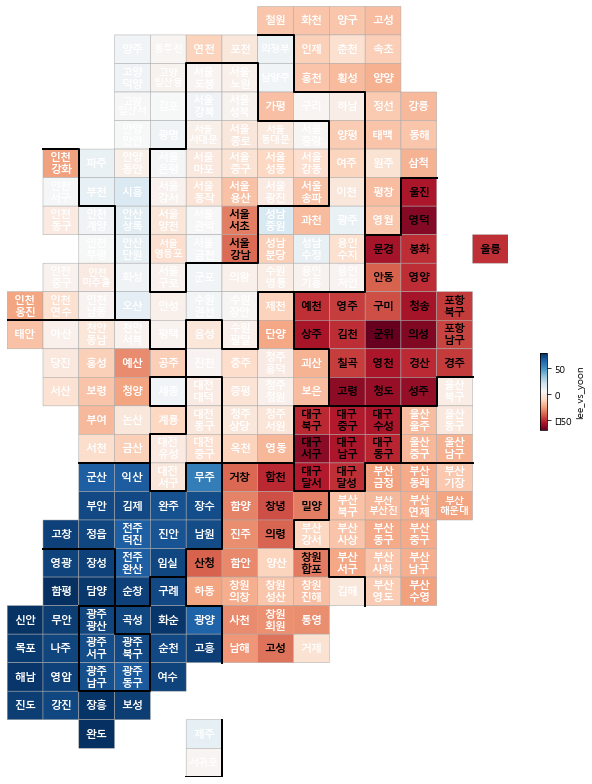

In [70]:
# 수도권 표심이 영향 많이 미쳤음
drawKorea('lee_vs_yoon', final_elect_data, 'RdBu')

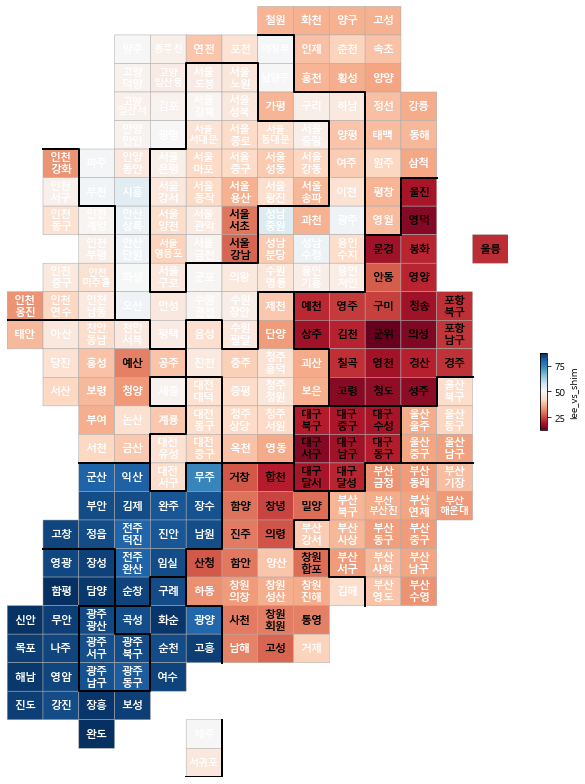

In [71]:
drawKorea('lee_vs_shim', final_elect_data, 'RdBu')

C:\Users\김혜린\AppData\Local\Temp\ipykernel_61524\1281317803.py:54: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  plt.tight_layout()
C:\Users\김혜린\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


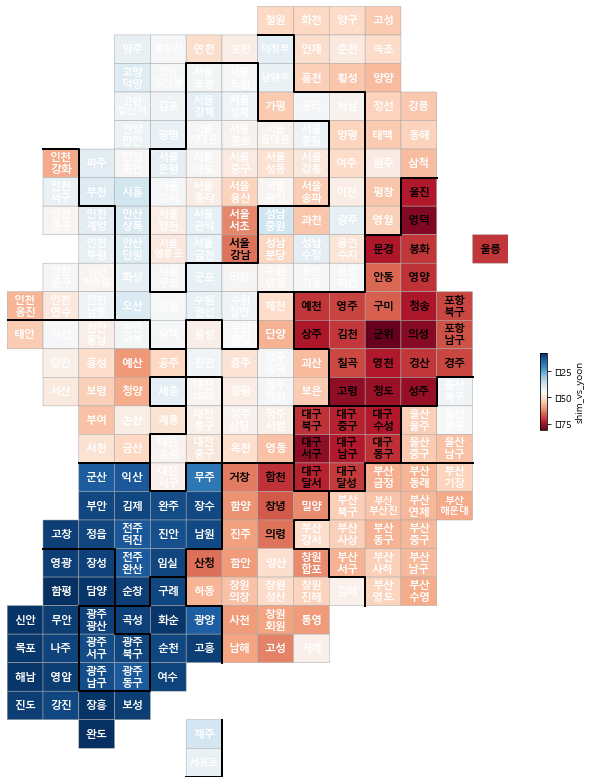

In [72]:
drawKorea('shim_vs_yoon', final_elect_data, 'RdBu')

In [74]:
import folium
import json
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [76]:
pop_folium = final_elect_data.set_index('ID')

del pop_folium['광역시도']
del pop_folium['시군']

pop_folium.head()

,pop,lee,yoon,shim,heo,rate_lee,rate_yoon,rate_shim,rate_heo,y,x,lee_vs_yoon,lee_vs_shim,shim_vs_yoon
ID,,,,,,,,,,,,,,
서울 종로,100629.0,46130.0,49172.0,3115.0,558.0,45.841656,48.864641,3.095529,0.554512,4,6,-3.022985,42.746127,-45.769112
서울 중구,84998.0,38244.0,42906.0,2310.0,463.0,44.994000,50.478835,2.717711,0.544719,5,6,-5.484835,42.276289,-47.761124
서울 용산,152068.0,60063.0,85047.0,4374.0,755.0,39.497462,55.926954,2.876345,0.496488,6,6,-16.429492,36.621117,-53.050609
서울 성동,197240.0,84411.0,103880.0,5365.0,969.0,42.796086,52.666802,2.720037,0.491280,5,7,-9.870716,40.076049,-49.946765
서울 광진,235471.0,109922.0,113733.0,7072.0,1416.0,46.681757,48.300215,3.003342,0.601348,6,7,-1.618458,43.678415,-45.296873


In [80]:
geo_path = '../data/05. skorea_municipalities_geo_simple.json'
geo_str = json.load(open(geo_path, encoding='utf-8'))

map = folium.Map(location=[36.2002, 127.054], zoom_start=6)
map.choropleth(geo_data = geo_str,
              data = pop_folium['lee_vs_yoon'],
              columns = [pop_folium.index, pop_folium['lee_vs_yoon']],
              fill_color = 'PuBu',
              key_on = 'feature.id')

map